## Суворов Роман ИВТ 2.1


In [19]:
# Импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn import tree
from sklearn import model_selection
from sklearn import metrics

# Для визуализации дерева
from sklearn.tree import plot_tree

# Для подбора гиперпараметров
from sklearn.model_selection import GridSearchCV, StratifiedKFold

%matplotlib inline
sns.set_style('whitegrid') # Стиль для графиков

## Загрузка и первичный анализ данных

In [20]:
# Читаем данные
voice_data = pd.read_csv('voice_gender.csv')
voice_data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402905,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [21]:
# Посмотрим на типизацию признаков и наличие пропусков
voice_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [22]:
# Убедимся, что пропусков нет
print('Количество пропусков:', voice_data.isnull().sum().sum())

Количество пропусков: 0


**Выводы по первичному анализу:**
- Данные успешно загружены.
- Все признаки, кроме целевого (`label`), имеют числовой тип (`float64`).
- Пропуски в данных отсутствуют, дополнительная обработка пропущенных значений не требуется.
- Целевой признак (`label`) имеет тип `object` (строки 'male' и 'female'). `sklearn` DecisionTreeClassifier может работать со строковыми метками классов, поэтому явное кодирование 0/1 не является строго обязательным для *этой* модели, но может потребоваться для других моделей или метрик. В рамках данного задания оставим как есть, следуя описанию.

## Формирование обучающей и тестовой выборок

In [23]:
# Определяем матрицу признаков (X) и вектор целевой переменной (y)
X = voice_data.drop('label', axis=1)
y = voice_data['label']

# Формируем обучающую и тестовую выборки в соотношении 80/20
# Используем stratify=y для сохранения пропорций классов в обеих выборках
# random_state=42 для воспроизводимости результатов разделения
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, 
    test_size=0.2, 
    stratify=y, 
    random_state=42
)

print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (2534, 20)
Test shape: (634, 20)


## Задание 1. Решающие пни (Decision Stumps)

Создайте модель дерева решений максимальной глубины 1 (`max_depth=1`). В качестве критерия информативности используйте энтропию Шеннона (`criterion='entropy'`).

In [24]:
# Создаем модель дерева решений с max_depth=1 и criterion='entropy'
# Добавим random_state для воспроизводимости (хотя для max_depth=1 на энтропии и так детерминировано)
dt_stump = tree.DecisionTreeClassifier(
    max_depth=1,
    criterion='entropy',
    random_state=42 # Добавим для надежности
)

# Обучаем модель на тренировочной выборке
dt_stump.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=42)

Визуализируйте модель в виде графа.

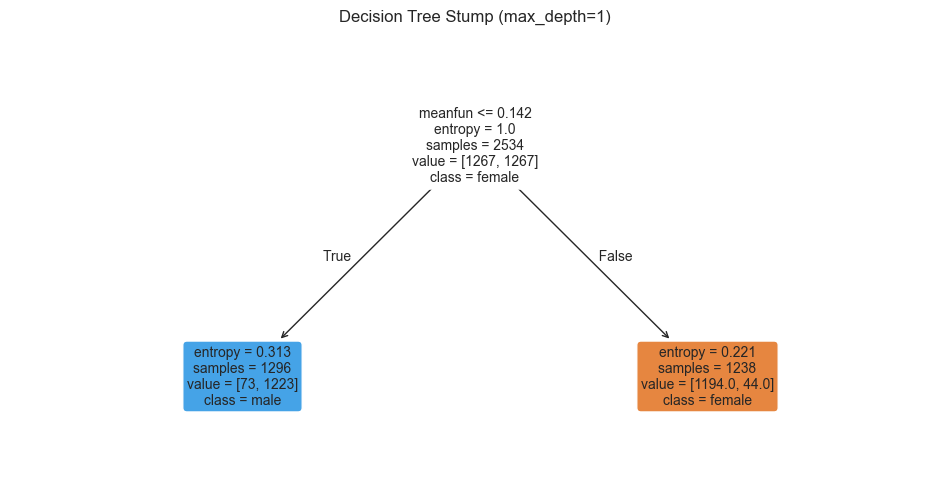

In [25]:
# Визуализируем дерево решений (решающий пень)
fig, ax = plt.subplots(figsize=(12, 6))
plot_tree(
    dt_stump, 
    feature_names=X_train.columns, # Названия признаков
    class_names=dt_stump.classes_, # Названия классов
    filled=True, # Раскраска узлов по классам
    rounded=True, # Скругленные углы узлов
    fontsize=10,
    ax=ax
);
plt.title('Decision Tree Stump (max_depth=1)')
plt.show()

1. На основе какого фактора будет построено решающее правило в корневой вершине?
2. Чему равно оптимальное пороговое значение для данного фактора? Ответ округлите до трёх знаков после точки-разделителя.
3. Сколько процентов наблюдений, для которых выполняется заданное в корневой вершине условие, содержится в обучающей выборке? Ответ округлите до одного знака после точки-разделителя. Не указывайте в ответе символ %.
4. Сделайте предсказание и рассчитайте значение метрики accuracy на тестовой выборке. Ответ округлите до трёх знаков после точки-разделителя.

In [26]:
# Анализ решающего пня для ответов на вопросы

# 1. Признак в корневой вершине:
# Смотрим на визуализацию или первый узел дерева
root_feature_index = dt_stump.tree_.feature[0]
root_feature_name = X_train.columns[root_feature_index]
print(f"1. Фактор в корневой вершине: {root_feature_name}")

# 2. Оптимальное пороговое значение:
# Смотрим на визуализацию или dt_stump.tree_.threshold[0]
root_threshold = dt_stump.tree_.threshold[0]
print(f"2. Оптимальное пороговое значение: {root_threshold:.3f}")

# 3. Процент наблюдений в обучающей выборке, удовлетворяющих условию:
# Условие в корневой вершине: root_feature_name <= root_threshold
satisfied_condition = X_train[root_feature_name] <= root_threshold
percentage_satisfied = (satisfied_condition.sum() / len(X_train)) * 100
print(f"3. Процент наблюдений (обучающая выборка), удовлетворяющих условию: {percentage_satisfied:.1f}")

# 4. Accuracy на тестовой выборке:
y_test_pred_stump = dt_stump.predict(X_test)
accuracy_stump = metrics.accuracy_score(y_test, y_test_pred_stump)
print(f"4. Accuracy на тестовой выборке: {accuracy_stump:.3f}")

1. Фактор в корневой вершине: meanfun
2. Оптимальное пороговое значение: 0.142
3. Процент наблюдений (обучающая выборка), удовлетворяющих условию: 51.1
4. Accuracy на тестовой выборке: 0.956


## Задание 2. Увеличим глубину дерева

Создайте дерево решений с максимальной глубиной 2 (`max_depth=2`). В качестве критерия информативности используйте энтропию Шеннона (`criterion='entropy'`). Обучите модель на тренировочной выборке и визуализируйте её.

In [27]:
# Создаем модель дерева решений с max_depth=2 и criterion='entropy'
dt_depth2 = tree.DecisionTreeClassifier(
    max_depth=2,
    criterion='entropy',
    random_state=42 # Для воспроизводимости
)

# Обучаем модель на тренировочной выборке
dt_depth2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

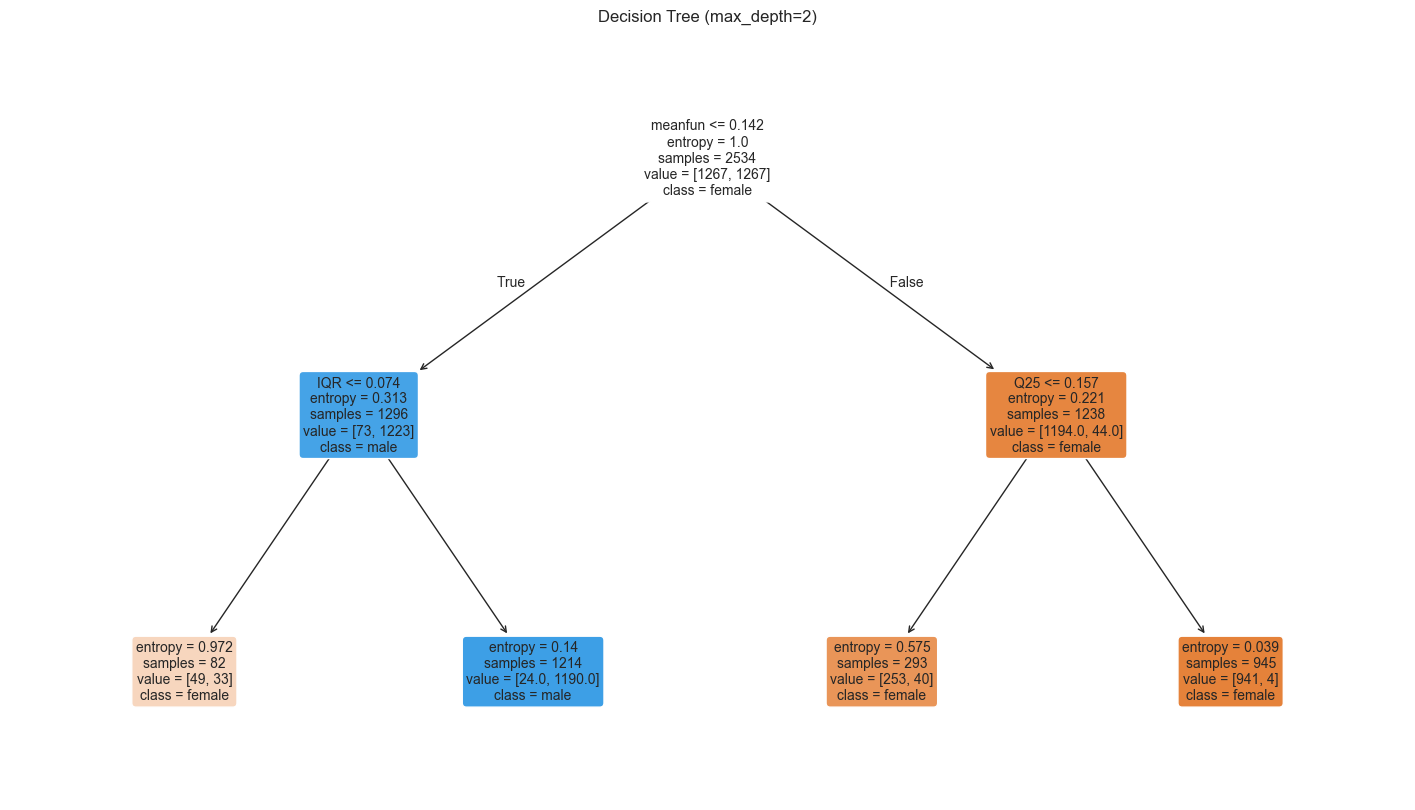

In [28]:
# Визуализируем дерево решений глубины 2
fig, ax = plt.subplots(figsize=(18, 10))
plot_tree(
    dt_depth2, 
    feature_names=X_train.columns, 
    class_names=dt_depth2.classes_, 
    filled=True, 
    rounded=True, 
    fontsize=10,
    ax=ax
);
plt.title('Decision Tree (max_depth=2)')
plt.show()

1. Из приведённых ниже факторов выберите те, что используются при построении данного дерева решений:
    * A meanfreq (средняя частота)
    * B median (медианная частота)
    * C IQR (межквартильный размах частот)
    * D meanfun (средняя основная частота в акустическом спектре)
    * E minfun (минимальная основная частота в акустическом спектре)
    * F Q25 (первый квартиль частоты)
2. Сколько листьев в построенном дереве содержат в качестве предсказания класс female?
3. Сделайте предсказание и рассчитайте значение метрики accuracy на тестовой выборке. Ответ округлите до трёх знаков после точки-разделителя.

In [29]:
# Анализ дерева глубины 2 для ответов на вопросы

# 1. Факторы, используемые в дереве:
# Смотрим на узлы дерева (глубина 0 и 1) на визуализации
used_feature_indices = np.unique(dt_depth2.tree_.feature[:dt_depth2.tree_.node_count])
# Исключаем -2, которое обозначает листья
used_feature_indices = used_feature_indices[used_feature_indices != -2]
used_feature_names = [X_train.columns[i] for i in used_feature_indices]

print(f"1. Факторы, используемые в дереве: {used_feature_names}")
# Сопоставляем с предложенными вариантами:
# A meanfreq, D meanfun, C IQR (проверяем по визуализации или структуре дерева)

# 2. Количество листьев с предсказанием 'female':
# Смотрим на листовые узлы (class=female) на визуализации
n_leaves = dt_depth2.get_n_leaves()
female_leaf_count = 0
# Проходимся по узлам дерева
for i in range(dt_depth2.tree_.node_count):
    # Если узел является листом (tree_.feature[i] == -2)
    if dt_depth2.tree_.feature[i] == -2:
        # Получаем распределение классов в листе (value)
        # Индексы классов соответствуют dt_depth2.classes_ (например, ['female', 'male'])
        class_counts = dt_depth2.tree_.value[i][0] # value[i][0] - это массив counts
        # Находим индекс класса с наибольшим количеством
        predicted_class_index = np.argmax(class_counts)
        # Получаем название предсказанного класса
        predicted_class = dt_depth2.classes_[predicted_class_index]
        # Если предсказанный класс 'female'
        if predicted_class == 'female':
            female_leaf_count += 1

print(f"2. Количество листьев, предсказывающих female: {female_leaf_count}")

# 3. Accuracy на тестовой выборке:
y_test_pred_depth2 = dt_depth2.predict(X_test)
accuracy_depth2 = metrics.accuracy_score(y_test, y_test_pred_depth2)
print(f"3. Accuracy на тестовой выборке: {accuracy_depth2:.3f}")

1. Факторы, используемые в дереве: ['Q25', 'IQR', 'meanfun']
2. Количество листьев, предсказывающих female: 3
3. Accuracy на тестовой выборке: 0.962


## Задание 3. Дадим дереву решений б’ольшую свободу

Создайте дерево решений, не ограничивая его максимальную глубину. В качестве критерия информативности используйте энтропию Шеннона (`criterion='entropy'`). В качестве значения параметра `random_state` возьмите 0. Обучите модель на тренировочной выборке.

In [30]:
# Создаем модель дерева решений без ограничения глубины
dt_full = tree.DecisionTreeClassifier(
    criterion='entropy',
    random_state=0 # random_state=0 как указано в задании
)

# Обучаем модель на тренировочной выборке
dt_full.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

1. Чему равна глубина полученного дерева решения?
2. Чему равно количество листьев в полученном дереве решений?
3. Сделайте предсказание для обучающей и тестовой выборок и рассчитайте значение метрики accuracy на каждой из выборок (отдельно на обучающей и тестовой). Ответы округлите до трёх знаков после точки-разделителя.

In [31]:
# Анализ дерева полной глубины

# 1. Глубина дерева:
depth_full = dt_full.get_depth()
print(f"1. Глубина полученного дерева решения: {depth_full}")

# 2. Количество листьев:
n_leaves_full = dt_full.get_n_leaves()
print(f"2. Количество листьев в полученном дереве решений: {n_leaves_full}")

# 3. Accuracy на обучающей и тестовой выборках:
y_train_pred_full = dt_full.predict(X_train)
y_test_pred_full = dt_full.predict(X_test)

accuracy_train_full = metrics.accuracy_score(y_train, y_train_pred_full)
accuracy_test_full = metrics.accuracy_score(y_test, y_test_pred_full)

print(f"3. Accuracy на обучающей выборке: {accuracy_train_full:.3f}")
print(f"   Accuracy на тестовой выборке: {accuracy_test_full:.3f}")

1. Глубина полученного дерева решения: 12
2. Количество листьев в полученном дереве решений: 54
3. Accuracy на обучающей выборке: 1.000
   Accuracy на тестовой выборке: 0.973


**Выводы по Заданию 3:**
Дерево полной глубины показывает очень высокую точность на обучающей выборке, но точность на тестовой выборке заметно ниже. Это является признаком **переобучения (overfitting)**. Модель слишком хорошо запомнила тренировочные данные, включая шум, и плохо обобщается на новые, unseen данные.

## Задание 4. Подбор оптимальных внешних параметров модели с помощью GridSearchCV

Найдем оптимальные гиперпараметры (`criterion`, `max_depth`, `min_samples_split`) для дерева решений, используя перебор по сетке с кросс-валидацией (`GridSearchCV`).

In [32]:
# Задаём сетку параметров для перебора
param_grid = {
    'criterion': ['gini', 'entropy'], # критерий информативности
    'max_depth': [4, 5, 6, 7, 8, 9, 10], # максимальная глубина дерева
    'min_samples_split': [3, 4, 5, 10] # минимальное количество объектов, необходимое для сплита
}

# Задаём метод кросс-валидации - StratifiedKFold для сохранения пропорций классов
cv = model_selection.StratifiedKFold(n_splits=5) # 5 фолдов

In [33]:
# Создаем базовую модель дерева решений с фиксированным random_state
base_tree_for_grid = tree.DecisionTreeClassifier(random_state=0)

# Создаем объект GridSearchCV
grid_search = GridSearchCV(
    estimator=base_tree_for_grid, # Оцениваемая модель
    param_grid=param_grid, # Сетка параметров
    cv=cv, # Метод кросс-валидации
    scoring='accuracy', # Метрика качества
    n_jobs=-1 # Использовать все доступные ядра процессора
)

# Запускаем перебор на обучающей выборке
print("Запуск GridSearchCV...")
grid_search.fit(X_train, y_train)
print("GridSearchCV завершен.")

# Выводим лучшие параметры и лучшую метрику на кросс-валидации
print("Лучшие параметры:", grid_search.best_params_)
print("Лучшая метрика (accuracy) на кросс-валидации:", grid_search.best_score_)

Запуск GridSearchCV...
GridSearchCV завершен.
Лучшие параметры: {'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 3}
Лучшая метрика (accuracy) на кросс-валидации: 0.9656687793811539


1. Какой критерий информативности использует наилучшая модель?
    * Критерий Джини
    * Энтропия Шеннона
2. Чему равна оптимальная найденная автоматически (с помощью GridSearchCV) максимальная глубина?
3. Чему равно оптимальное минимальное количество объектов, необходимое для разбиения?
4. С помощью наилучшей модели сделайте предсказание отдельно для обучающей и тестовой выборок. Рассчитайте значение метрики accuracy на каждой из выборок. Ответы округлите до трёх знаков после точки-разделителя.

In [34]:
# Анализ результатов GridSearchCV для ответов на вопросы

best_params = grid_search.best_params_

print(f"1. Критерий информативности наилучшей модели: {best_params['criterion']}")
print(f"2. Оптимальная максимальная глубина: {best_params['max_depth']}")
print(f"3. Оптимальное минимальное количество объектов для разбиения: {best_params['min_samples_split']}")

# Получаем наилучшую модель из GridSearchCV
best_model = grid_search.best_estimator_

# Делаем предсказание наилучшей моделью на обучающей и тестовой выборках
y_train_pred_best = best_model.predict(X_train)
y_test_pred_best = best_model.predict(X_test)

# Рассчитываем accuracy
accuracy_train_best = metrics.accuracy_score(y_train, y_train_pred_best)
accuracy_test_best = metrics.accuracy_score(y_test, y_test_pred_best)

print(f"4. Accuracy наилучшей модели на обучающей выборке: {accuracy_train_best:.3f}")
print(f"   Accuracy наилучшей модели на тестовой выборке: {accuracy_test_best:.3f}")

1. Критерий информативности наилучшей модели: gini
2. Оптимальная максимальная глубина: 7
3. Оптимальное минимальное количество объектов для разбиения: 3
4. Accuracy наилучшей модели на обучающей выборке: 0.996
   Accuracy наилучшей модели на тестовой выборке: 0.970


## Задание 5. Важность факторов

Для оптимального дерева решений, построенного в Задании 4, найдите важность каждого из факторов (`feature_importances_`). Визуализируйте её в виде столбчатой диаграммы.

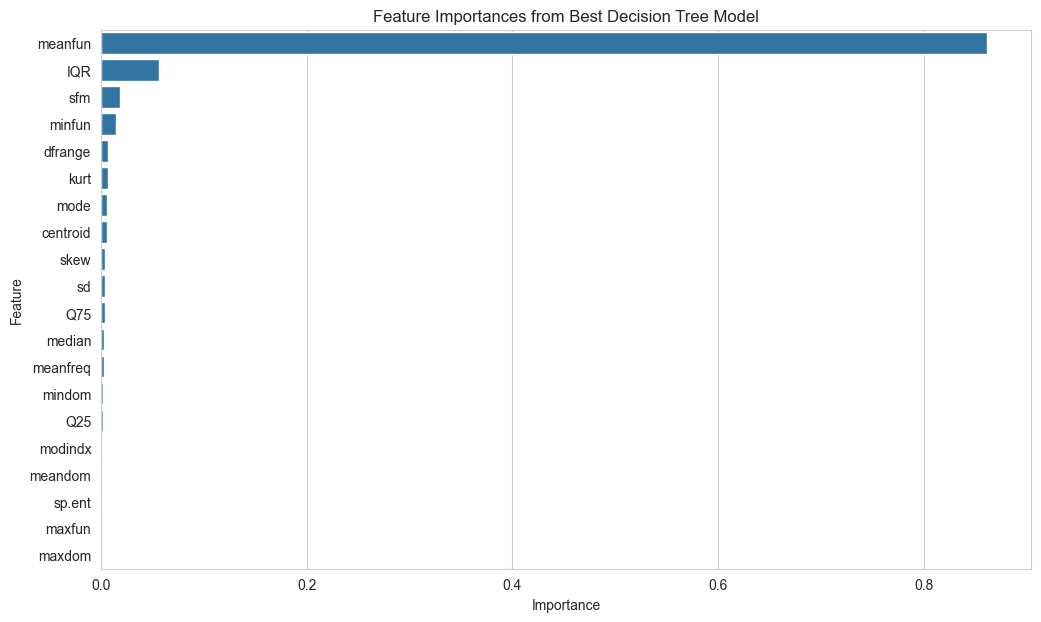

In [35]:
# Получаем важность признаков из наилучшей модели
importances = best_model.feature_importances_

# Получаем названия признаков
feature_names = X_train.columns

# Создаем Series для удобства сортировки
feature_importances = pd.Series(importances, index=feature_names)

# Сортируем по убыванию важности
feature_importances_sorted = feature_importances.sort_values(ascending=False)

# Визуализируем важность признаков
plt.figure(figsize=(12, 7))
sns.barplot(x=feature_importances_sorted, y=feature_importances_sorted.index)
plt.title('Feature Importances from Best Decision Tree Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Выделите топ-3 наиболее важных факторов:

In [36]:
# Выводим топ-3 наиболее важных признаков
top_3_features = feature_importances_sorted.head(3).index.tolist()

print("Топ-3 наиболее важных фактора:")
for i, feature in enumerate(top_3_features):
    print(f"{i+1}. {feature}")


Топ-3 наиболее важных фактора:
1. meanfun
2. IQR
3. sfm


## Выводы

В ходе лабораторной работы были поэтапно построены и исследованы деревья решений различной сложности для определения пола по голосу. Мы продемонстрировали, что дерево с максимальной глубиной склонно к переобучению. Используя GridSearchCV и кросс-валидацию, мы подобрали наилучшие гиперпараметры, что помогло создать модель с высокой точностью на тестовых данных. Кроме того, был выполнен анализ значимости признаков, позволивший определить наиболее важные акустические параметры для решения задачи классификации.